# Machine Learning 15: What is Regularization?

## 🔍 What is Regularization?

In machine learning, **regularization** is a technique used to prevent **overfitting** by adding a penalty term to the loss function. Overfitting occurs when a model learns the noise in the training data, resulting in poor generalization to unseen data.


## 📘 L1 Regularization (Lasso)

### 🧮 Mathematical Form:

In linear regression, the L1-regularized cost function is:

$$
\text{Loss}_{L1} = \text{MSE} + \lambda \sum_{j=1}^{n} |\theta_j|
$$

* **MSE** is the Mean Squared Error.
* $\theta_j$ are the model weights.
* $\lambda$ is the regularization parameter controlling the penalty strength.

### 🧠 Intuition:

* The **absolute value** penalty tends to shrink some coefficients **exactly to zero**.
* This means L1 **performs feature selection**, effectively removing irrelevant features from the model.

### ✅ Use When:

* You suspect that **many features are irrelevant** or you want a **sparse model**.
* You're looking for **interpretability**, i.e., knowing which features matter.

---

## 📗 L2 Regularization (Ridge)

### 🧮 Mathematical Form:

In linear regression, the L2-regularized cost function is:

$$
\text{Loss}_{L2} = \text{MSE} + \lambda \sum_{j=1}^{n} \theta_j^2
$$

### 🧠 Intuition:

* The **squared** penalty discourages large weights but does **not eliminate them**.
* All features remain in the model but with **smaller, more evenly distributed weights**.

### ✅ Use When:

* All features may be useful, and you want to **keep them all** but reduce overfitting.
* You care about **stability and small variance** in the model predictions.

---

## 🧠 Geometric Intuition

* **L1** penalty creates a diamond-shaped constraint region. The corners encourage solutions where some coefficients are exactly zero.
* **L2** penalty creates a circular constraint region, encouraging all weights to be small but non-zero.

---

## 📌 Elastic Net: Best of Both Worlds

$$
\text{Loss} = \text{MSE} + \lambda_1 \sum |\theta_j| + \lambda_2 \sum \theta_j^2
$$

* Combines L1 and L2 penalties.
* Ideal when you have many features and expect correlations between them.

---

## 🧪 Summary

* **L1 Regularization (Lasso)**: Feature selection, sparse models, best when some features are unimportant.
* **L2 Regularization (Ridge)**: Shrinks all weights, better with multicollinearity or when all features matter.
* **Elastic Net**: Blends both when you're unsure or have many correlated variables.


In [1]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

✅ Explanation:

- pandas: for loading and handling tabular data.
- numpy: for numerical operations.
- train_test_split: to split data into training and testing sets.
- Ridge, Lasso: for L2 and L1 regularized models.
- mean_squared_error, r2_score: for evaluating model performance.

In [2]:
df =pd.read_csv("Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
# 3. Preprocessing: Convert categorical to numeric if needed
df = pd.get_dummies(df, drop_first=True)

✅ Explanation:

- Converts categorical variables (e.g., location) into numerical using One-Hot Encoding.
- drop_first=True avoids dummy variable trap.



In [4]:
# 4. Feature and Target Separation
X = df.drop('price', axis=1)  # Independent variables
y = df['price']               # Dependent variable

✅ Explanation:

- X is the matrix of features (area, rooms, etc.).
- y is the target variable (price).



In [5]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

✅ Explanation:
- 80% training, 20% testing.
- random_state=42 ensures reproducibility.

In [6]:
# 6. Ridge (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

✅ Explanation:

- alpha=1.0: Regularization strength.
- Ridge penalizes large weights using squared coefficients (L2).
- Fit the model and make predictions.



In [7]:
# 7. Lasso (L1 Regularization)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

In [8]:
# 8. Evaluate Performance
print("Ridge MSE:", mean_squared_error(y_test, ridge_preds))
print("Ridge R^2:", r2_score(y_test, ridge_preds))

print("Lasso MSE:", mean_squared_error(y_test, lasso_preds))
print("Lasso R^2:", r2_score(y_test, lasso_preds))

Ridge MSE: 1756474279575.285
Ridge R^2: 0.6524978002155009
Lasso MSE: 1754321267747.6252
Lasso R^2: 0.6529237537036754


✅ Explanation:

- Lasso penalizes large weights using absolute value of coefficients (L1).
- Useful for feature selection because it can zero out less useful features.

In [9]:
# 9. View Coefficients
ridge_coefs = pd.Series(ridge.coef_, index=X.columns)
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)

✅ Explanation:

- MSE (Mean Squared Error): Lower is better.
- R² Score: Closer to 1 is better. Shows how much variance is explained.

In [10]:
df = pd.DataFrame({
    'Ridge Coefficients': ridge_coefs,
    'Lasso Coefficients': lasso_coefs
})

In [11]:
df

,Ridge Coefficients,Lasso Coefficients
area,2.371834e+02,2.359699e+02
bedrooms,7.980716e+04,7.677810e+04
bathrooms,1.082243e+06,1.094442e+06
stories,4.095070e+05,4.074776e+05
parking,2.266541e+05,2.248421e+05
mainroad_yes,3.624757e+05,3.679131e+05
guestroom_yes,2.311725e+05,2.316052e+05
basement_yes,3.906071e+05,3.902510e+05
hotwaterheating_yes,6.501729e+05,6.846274e+05
airconditioning_yes,7.813504e+05,7.914227e+05


In [12]:
import matplotlib.pyplot as plt

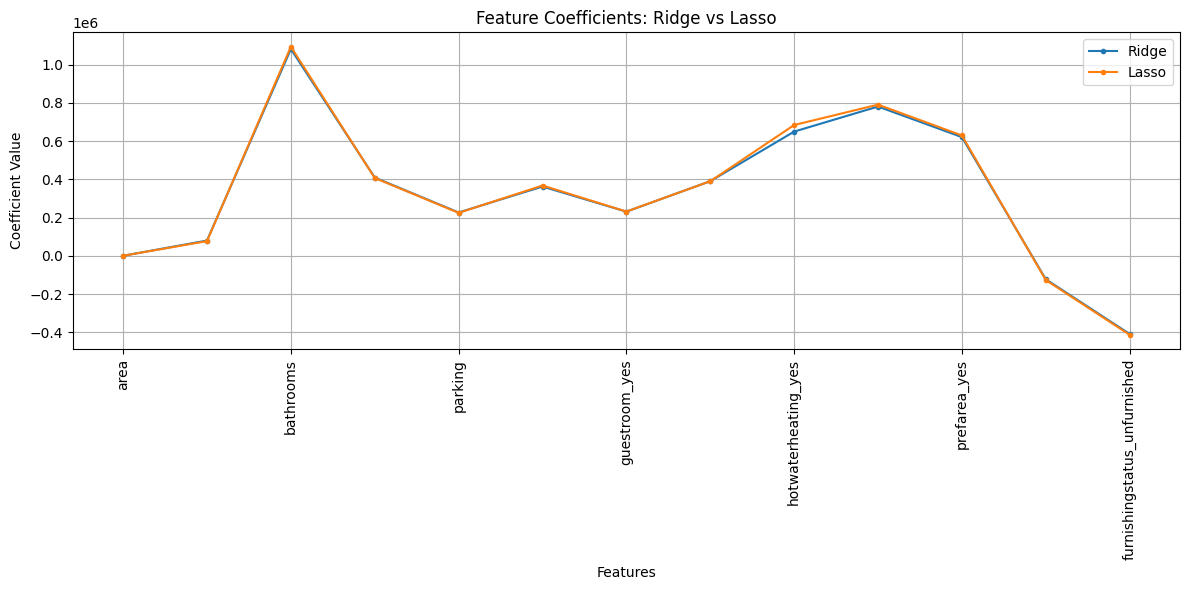

In [14]:
plt.figure(figsize=(12, 6))
ridge_coefs.plot(label='Ridge', style='.-')
lasso_coefs.plot(label='Lasso', style='.-')
plt.title('Feature Coefficients: Ridge vs Lasso')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()